In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.executable

'w:\\7_Semester\\Machine Learning\\labs\\.venv\\Scripts\\python.exe'

# Data Loading Practice


---
## Manual Data Loading (typecasting a dictionary into a data frame)
---


In [2]:
students = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [24, 22, 23, 21],
}
df = pd.DataFrame(students)

df

Name  Age
0    Alice   24
1      Bob   22
2  Charlie   23
3    David   21

---
## Loading a CSV file
---


In [3]:
csv_df = pd.read_csv(
    "Datasets/students.csv",
    header=None,  # header arg to specify if the CSV file has a header row and which one
    index_col=0,  # index_col arg to specify which column to use as the row labels of the DataFrame
)
print(csv_df.head(3))
print(csv_df.columns)
print("==========================================")
print(csv_df.index)

               1
0               
Name       Marks
Student_1     78
Student_2     91
Index([1], dtype='int64')
Index(['Name', 'Student_1', 'Student_2', 'Student_3', 'Student_4', 'Student_5',
       'Student_6', 'Student_7', 'Student_8', 'Student_9', 'Student_10',
       'Student_11', 'Student_12', 'Student_13', 'Student_14', 'Student_15',
       'Student_16', 'Student_17', 'Student_18', 'Student_19', 'Student_20',
       'Student_21', 'Student_22', 'Student_23', 'Student_24', 'Student_25',
       'Student_26', 'Student_27', 'Student_28', 'Student_29', 'Student_30',
       'Student_31', 'Student_32', 'Student_33', 'Student_34', 'Student_35',
       'Student_36', 'Student_37', 'Student_38', 'Student_39', 'Student_40',
       'Student_41', 'Student_42', 'Student_43', 'Student_44', 'Student_45',
       'Student_46', 'Student_47', 'Student_48', 'Student_49', 'Student_50'],
      dtype='object', name=0)


---
## Loading Data from a Excel file
---


In [4]:
excel_df = pd.read_excel(
    "Datasets/extra.xlsx", skiprows=5, nrows=10
)  # skiprows and nrows args to specify which rows to skip and how many rows to read
print(excel_df.head(5))
print(excel_df.shape)

    Student_5  8
0   Student_6  0
1   Student_7  8
2   Student_8  6
3   Student_9  8
4  Student_10  7
(10, 2)


---
## Loading Data from a JSON file
---


In [5]:
json_df = pd.read_json("Datasets/attendance.json")
json_df.tail(3)

Name  Attendance
47  Student_48          65
48  Student_49          94
49  Student_50          67

---
## Loading Data from a URL to a file (raw github URL)
---


In [6]:
url_df = pd.read_csv(
    "https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
)
url_df.head(3)

Date Country/Region Province/State  Confirmed  Recovered  Deaths
0  2020-01-22    Afghanistan            NaN          0        0.0       0
1  2020-01-23    Afghanistan            NaN          0        0.0       0
2  2020-01-24    Afghanistan            NaN          0        0.0       0

---
# $$ Activity.No.1 $$
---


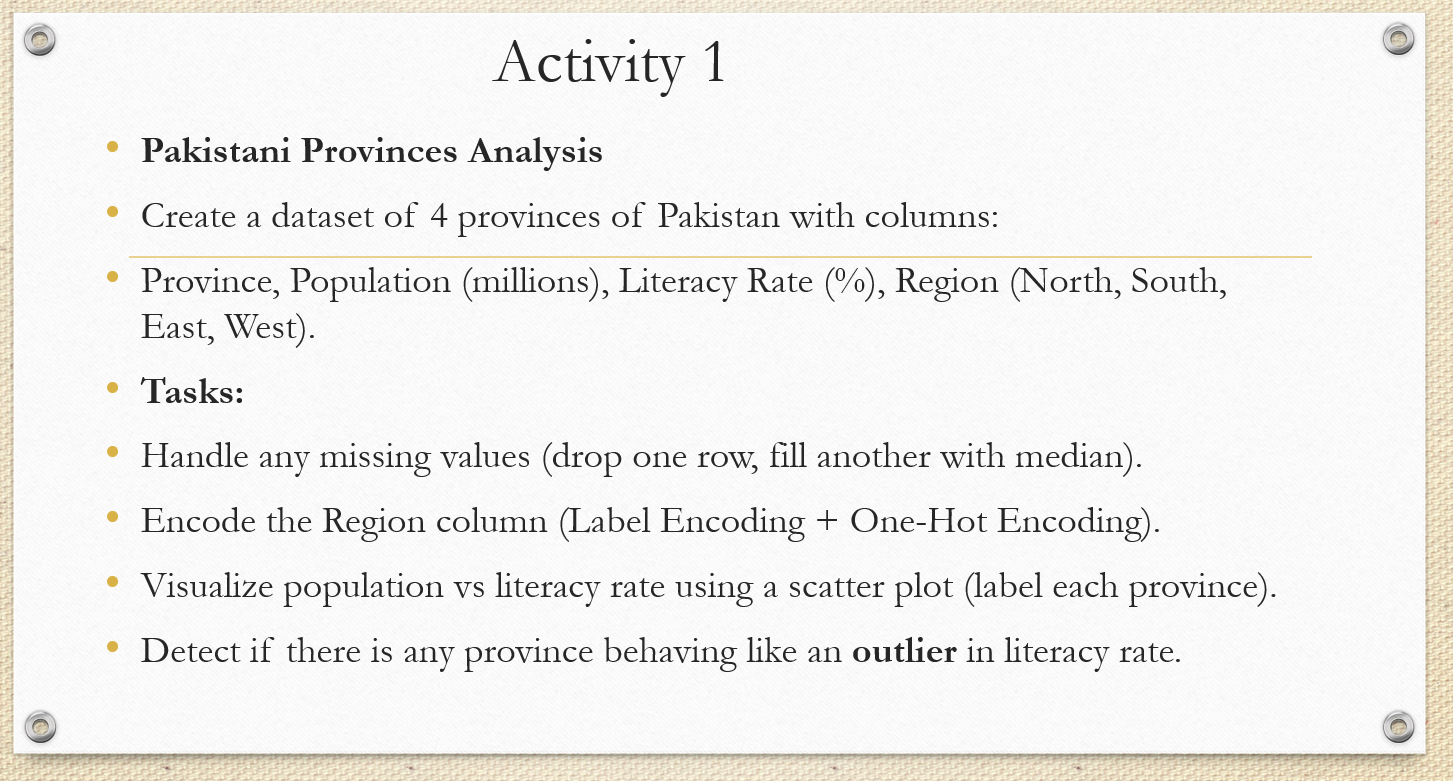


In [7]:
provinces = {
    "Province": ["Punjab", "Sindh", "Khyber Pakhtunkhwa", "Balochistan"],
    "Population (millions)": [127, 55.7, 40.8, 15],
    "Literacy Rate (%)": [66.3, 57.54, 51.09, None],
    "Region (North/South/East/West)": [None, "South", "North", "West"],
}

provinces_df = pd.DataFrame(provinces)
provinces_df

Province  Population (millions)  Literacy Rate (%)  \
0              Punjab                  127.0              66.30   
1               Sindh                   55.7              57.54   
2  Khyber Pakhtunkhwa                   40.8              51.09   
3         Balochistan                   15.0                NaN   

  Region (North/South/East/West)  
0                           None  
1                          South  
2                          North  
3                           West

In [8]:
print(provinces_df.isnull().sum())
print("==========================================")
provinces_df[provinces_df.isnull().any(axis=1)]

Province                          0
Population (millions)             0
Literacy Rate (%)                 1
Region (North/South/East/West)    1
dtype: int64


Province  Population (millions)  Literacy Rate (%)  \
0       Punjab                  127.0               66.3   
3  Balochistan                   15.0                NaN   

  Region (North/South/East/West)  
0                           None  
3                           West

In [9]:
to_drop = provinces_df[provinces_df.isnull().any(axis=1)].index[0]
print(to_drop)
print("==========================================")
provinces_df = provinces_df.drop(to_drop)
provinces_df

0


Province  Population (millions)  Literacy Rate (%)  \
1               Sindh                   55.7              57.54   
2  Khyber Pakhtunkhwa                   40.8              51.09   
3         Balochistan                   15.0                NaN   

  Region (North/South/East/West)  
1                          South  
2                          North  
3                           West

In [10]:
provinces_df.fillna(provinces_df["Literacy Rate (%)"].median(), inplace=True)
provinces_df

Province  Population (millions)  Literacy Rate (%)  \
1               Sindh                   55.7             57.540   
2  Khyber Pakhtunkhwa                   40.8             51.090   
3         Balochistan                   15.0             54.315   

  Region (North/South/East/West)  
1                          South  
2                          North  
3                           West

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_provinces = provinces_df.copy()
le_provinces["Region (North/South/East/West)"] = le.fit_transform(
    le_provinces["Region (North/South/East/West)"]
)
le_provinces

Province  Population (millions)  Literacy Rate (%)  \
1               Sindh                   55.7             57.540   
2  Khyber Pakhtunkhwa                   40.8             51.090   
3         Balochistan                   15.0             54.315   

   Region (North/South/East/West)  
1                               1  
2                               0  
3                               2

In [12]:
le.inverse_transform([0, 1, 2])

array(['North', 'South', 'West'], dtype=object)

In [13]:
provinces_df

Province  Population (millions)  Literacy Rate (%)  \
1               Sindh                   55.7             57.540   
2  Khyber Pakhtunkhwa                   40.8             51.090   
3         Balochistan                   15.0             54.315   

  Region (North/South/East/West)  
1                          South  
2                          North  
3                           West

In [14]:
onehot_provinces = pd.get_dummies(
    provinces_df, columns=["Region (North/South/East/West)"]
)
onehot_provinces

Province  Population (millions)  Literacy Rate (%)  \
1               Sindh                   55.7             57.540   
2  Khyber Pakhtunkhwa                   40.8             51.090   
3         Balochistan                   15.0             54.315   

   Region (North/South/East/West)_North  Region (North/South/East/West)_South  \
1                                 False                                  True   
2                                  True                                 False   
3                                 False                                 False   

   Region (North/South/East/West)_West  
1                                False  
2                                False  
3                                 True

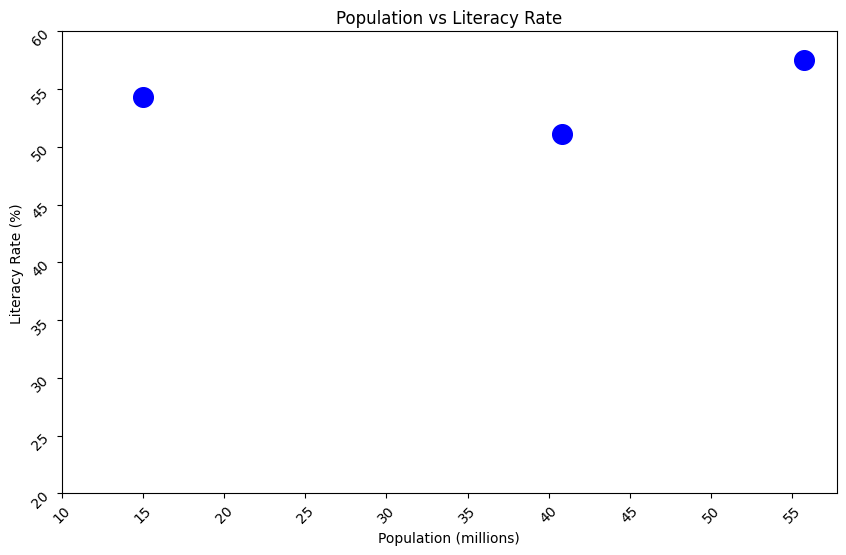

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(
    provinces_df["Population (millions)"],
    provinces_df["Literacy Rate (%)"],
    color="blue",
    s=200,
)
plt.title("Population vs Literacy Rate")
plt.xlabel("Population (millions)")
plt.ylabel("Literacy Rate (%)")
plt.xticks(range(10, 60, 5), rotation=45)
plt.yticks(range(20, 65, 5), rotation=45)
plt.show()

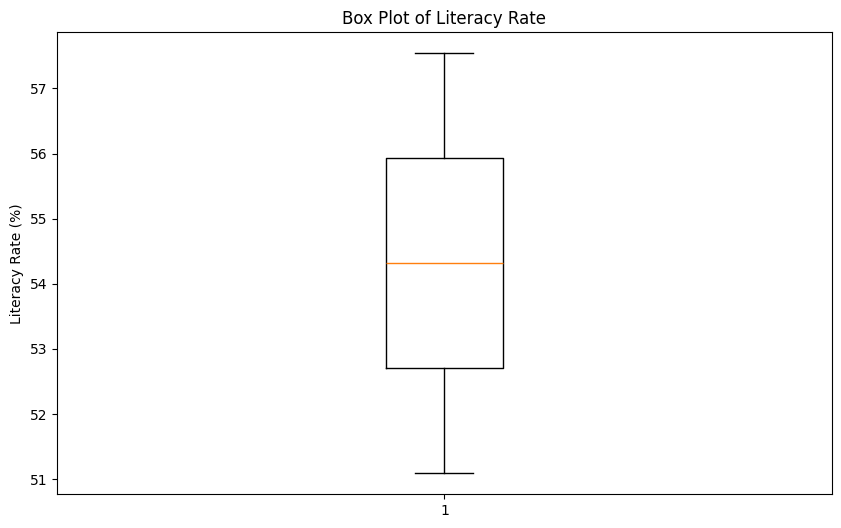

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    provinces_df["Literacy Rate (%)"],
)
plt.title("Box Plot of Literacy Rate")
plt.ylabel("Literacy Rate (%)")
plt.show()

---
# $$ Activity.No.2 $$
---


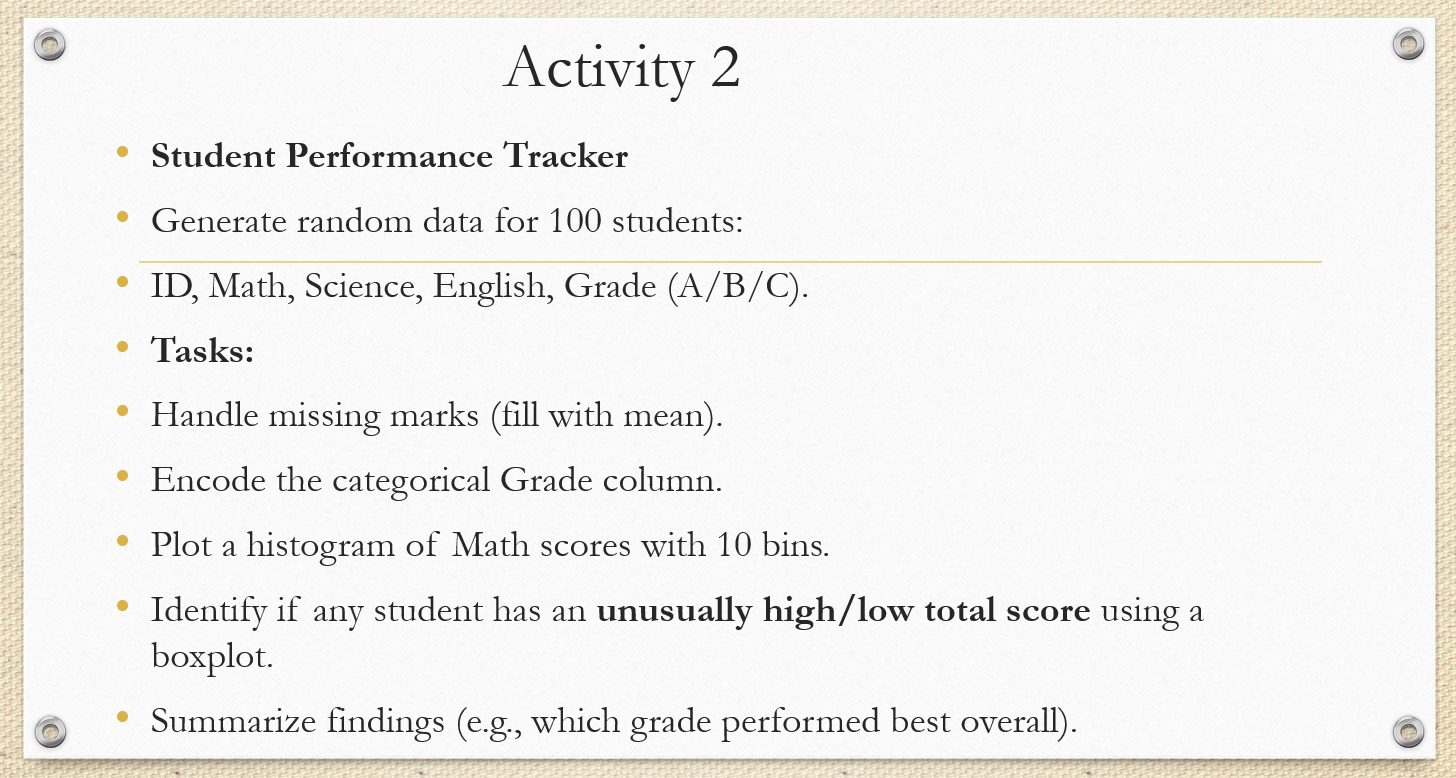


In [17]:
import numpy as np

np.random.seed(42)
students_dict = {
    "ID": range(1, 101),
    "Math": np.random.randint(0, 101, 100),
    "Science": np.random.randint(0, 101, 100),
    "English": np.random.randint(0, 101, 100),
    "Grade": np.random.choice(["A", "B", "C"], 100),
}

students_df = pd.DataFrame(students_dict)
students_df = students_df.set_index("ID")
print(students_df.head(5))
print("==========================================")
print(students_df.shape)

    Math  Science  English Grade
ID                              
1     51       23       69     C
2     92       25       71     C
3     14       88       26     A
4     71       59        8     A
5     60       40       61     C
(100, 4)


In [18]:
students_df.isnull().sum()

Math       0
Science    0
English    0
Grade      0
dtype: int64

In [19]:
students_df.loc[[1, 2, 3], "Math"] = None
print(students_df.isnull().sum())
print("==========================================")
print(students_df[students_df.isnull().any(axis=1)])

Math       3
Science    0
English    0
Grade      0
dtype: int64
    Math  Science  English Grade
ID                              
1    NaN       23       69     C
2    NaN       25       71     C
3    NaN       88       26     A


In [20]:
students_df.head(5)

Math  Science  English Grade
ID                              
1    NaN       23       69     C
2    NaN       25       71     C
3    NaN       88       26     A
4   71.0       59        8     A
5   60.0       40       61     C

In [21]:
students_df.fillna(students_df["Math"].mean(), inplace=True)
students_df["Math"] = students_df["Math"].astype(int)
print(students_df[students_df.isnull().any(axis=1)])
print("==========================================")
print(students_df.head(5))
print("==========================================")
print(students_df.dtypes)

Empty DataFrame
Columns: [Math, Science, English, Grade]
Index: []
    Math  Science  English Grade
ID                              
1     51       23       69     C
2     51       25       71     C
3     51       88       26     A
4     71       59        8     A
5     60       40       61     C
Math        int64
Science     int32
English     int32
Grade      object
dtype: object


In [22]:
onehot_students = pd.get_dummies(students_df, columns=["Grade"])
onehot_students.head(5)

Math  Science  English  Grade_A  Grade_B  Grade_C
ID                                                   
1     51       23       69    False    False     True
2     51       25       71    False    False     True
3     51       88       26     True    False    False
4     71       59        8     True    False    False
5     60       40       61    False    False     True

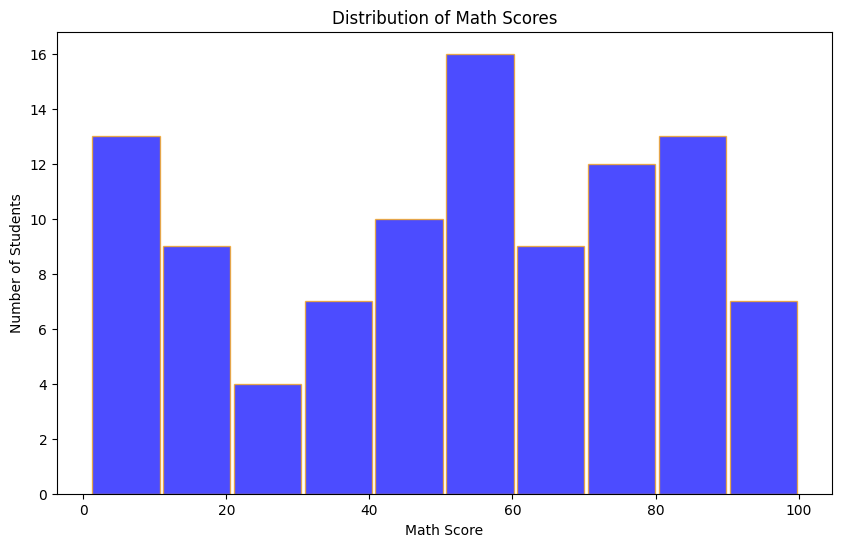

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(
    students_df["Math"],
    bins=10,
    color="blue",
    edgecolor="orange",
    alpha=0.7,
    rwidth=0.95,
)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.show()

In [24]:
students_df["Total"] = (
    students_df["Math"] + students_df["Science"] + students_df["English"]
)
students_df

Math  Science  English Grade  Total
ID                                      
1      51       23       69     C    143
2      51       25       71     C    147
3      51       88       26     A    165
4      71       59        8     A    138
5      60       40       61     C    161
..    ...      ...      ...   ...    ...
96     39        0        0     C     39
97     84       26       47     C    157
98     79       61       11     B    151
99     81       76       68     B    225
100    52        2       36     B     90

[100 rows x 5 columns]

In [25]:
print(students_df[students_df["Total"] == students_df["Total"].max()])
print(students_df[students_df["Total"] == students_df["Total"].min()])


    Math  Science  English Grade  Total
ID                                     
62    91       95       79     B    265
    Math  Science  English Grade  Total
ID                                     
49    20        0       16     C     36


- the max and the min values fall within the logical range (3 subjects, each with a 100 total, so max could be 300 and min could obvioulsy be 0, all the values fall within that range so nothing unusal)


In [26]:
students_df["Grade"].value_counts()

Grade
A    34
B    34
C    32
Name: count, dtype: int64

- can't really tell "which grade performed best overall" since the values aren't logical (used random.choice above to assign grades) so lets first override the grades column and make it make sense.


In [27]:
students_df["Grade"] = np.where(
    students_df["Total"] >= 250, "A", np.where(students_df["Total"] >= 150, "B", "C")
)
print(students_df.sort_values("Total", ascending=False).head(10))

    Math  Science  English Grade  Total
ID                                     
62    91       95       79     A    265
93    77       88       89     A    254
82    89       61       91     B    241
41    61       90       89     B    240
79    92       65       81     B    238
11    87       70       78     B    235
58    89       41       96     B    226
99    81       76       68     B    225
55    59       78       85     B    222
35    59       61       96     B    216


In [28]:
students_df["Grade"].value_counts()

Grade
B    54
C    44
A     2
Name: count, dtype: int64

- alright, now the grades column makes sense, here are the obvious findings:
  - only 2 out of the 100 students got an A grade.
  - the majority of the students did pretty decent and ended up with a B grade.
  - 44 students did quite poorly and ended up with a C grade.


---
# $$ Activity.No.3 $$
---


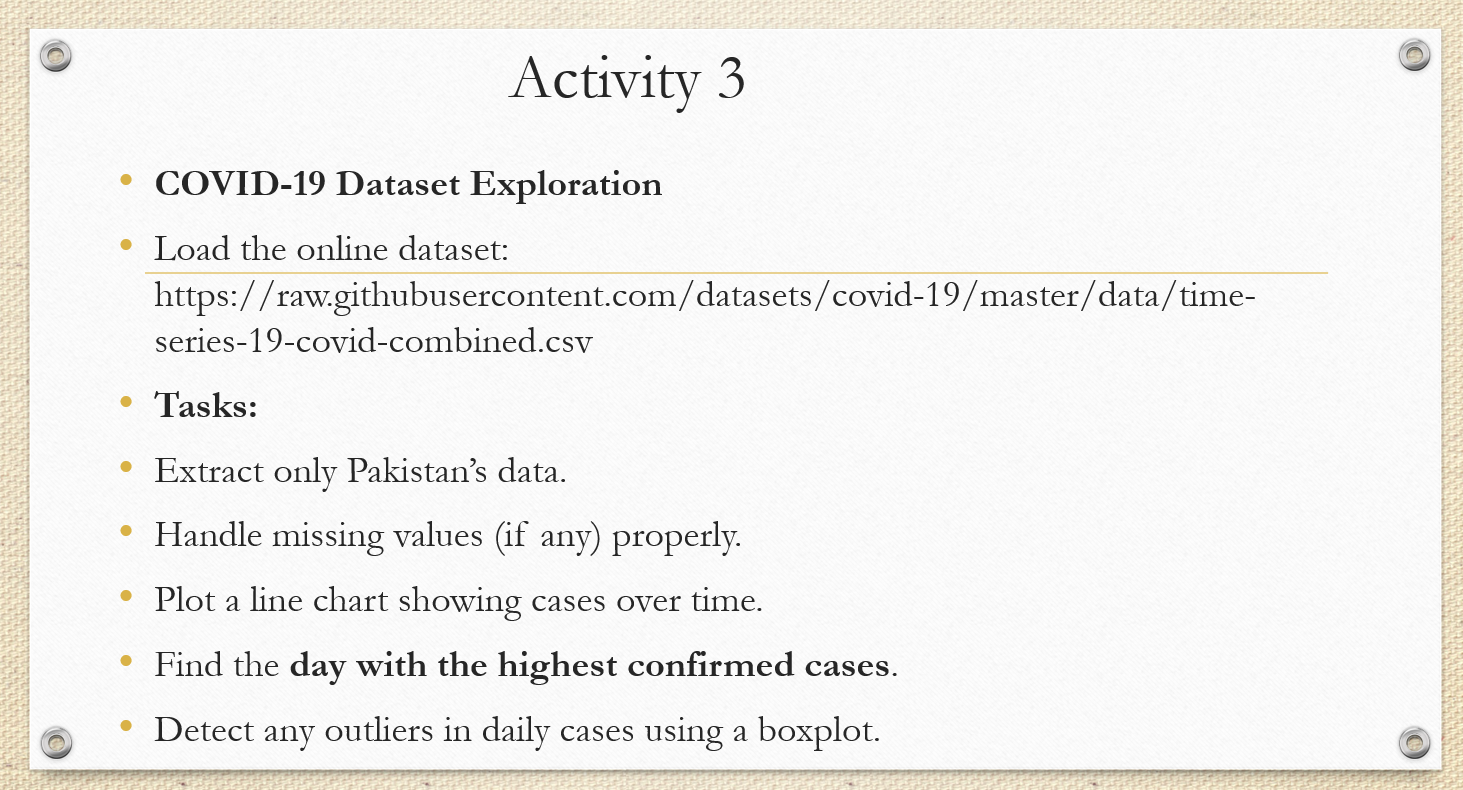


In [29]:
cov_df = pd.read_csv(
    "https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
)
cov_df.shape

(231744, 6)

In [30]:
cov_df[cov_df["Country/Region"] == "Pakistan"]

Date Country/Region Province/State  Confirmed  Recovered  Deaths
168912  2020-01-22       Pakistan            NaN          0        0.0       0
168913  2020-01-23       Pakistan            NaN          0        0.0       0
168914  2020-01-24       Pakistan            NaN          0        0.0       0
168915  2020-01-25       Pakistan            NaN          0        0.0       0
168916  2020-01-26       Pakistan            NaN          0        0.0       0
...            ...            ...            ...        ...        ...     ...
169723  2022-04-12       Pakistan            NaN    1526829        0.0   30362
169724  2022-04-13       Pakistan            NaN    1526952        0.0   30362
169725  2022-04-14       Pakistan            NaN    1526952        0.0   30362
169726  2022-04-15       Pakistan            NaN    1527151        0.0   30363
169727  2022-04-16       Pakistan            NaN    1527248        0.0   30363

[816 rows x 6 columns]

In [31]:
cov_df.isnull().sum()

Date                   0
Country/Region         0
Province/State    159120
Confirmed              0
Recovered          13056
Deaths                 0
dtype: int64

In [32]:
cov_df["Province/State"] = cov_df["Province/State"].fillna("Unknown")
cov_df.isnull().sum()

Date                  0
Country/Region        0
Province/State        0
Confirmed             0
Recovered         13056
Deaths                0
dtype: int64

In [33]:
print(cov_df["Recovered"].isnull().sum())

13056


In [34]:
print(cov_df["Recovered"][cov_df["Country/Region"] == "Canada"].notnull().sum())
cov_df[cov_df["Country/Region"] == "Canada"].count()

0


Date              13056
Country/Region    13056
Province/State    13056
Confirmed         13056
Recovered             0
Deaths            13056
dtype: int64

- ok so, that means ALL of the missing values of "Recovered" belong to Canada. I assume they didn't bother recording how many people recovered from covid in Canada or something.
- I can't think of a good way to fill in this column. I though I could simply do Confirmed - Deaths and that would equate to people who recovered but seeing the rest of the dataset, that is not the case. lets just fill it all with 0


In [35]:
cov_df[cov_df.isnull().any(axis=1)]

Date Country/Region Province/State  Confirmed  Recovered  Deaths
32640  2020-01-22         Canada        Alberta          0        NaN       0
32641  2020-01-23         Canada        Alberta          0        NaN       0
32642  2020-01-24         Canada        Alberta          0        NaN       0
32643  2020-01-25         Canada        Alberta          0        NaN       0
32644  2020-01-26         Canada        Alberta          0        NaN       0
...           ...            ...            ...        ...        ...     ...
45691  2022-04-12         Canada          Yukon       3940        NaN      24
45692  2022-04-13         Canada          Yukon       4000        NaN      24
45693  2022-04-14         Canada          Yukon       4015        NaN      24
45694  2022-04-15         Canada          Yukon       4015        NaN      24
45695  2022-04-16         Canada          Yukon       4015        NaN      24

[13056 rows x 6 columns]

In [36]:
cov_df.iloc[32635:32650]

Date Country/Region Province/State  Confirmed  Recovered  Deaths
32635  2022-04-12       Cameroon        Unknown     119780        0.0    1927
32636  2022-04-13       Cameroon        Unknown     119780        0.0    1927
32637  2022-04-14       Cameroon        Unknown     119780        0.0    1927
32638  2022-04-15       Cameroon        Unknown     119780        0.0    1927
32639  2022-04-16       Cameroon        Unknown     119780        0.0    1927
32640  2020-01-22         Canada        Alberta          0        NaN       0
32641  2020-01-23         Canada        Alberta          0        NaN       0
32642  2020-01-24         Canada        Alberta          0        NaN       0
32643  2020-01-25         Canada        Alberta          0        NaN       0
32644  2020-01-26         Canada        Alberta          0        NaN       0
32645  2020-01-27         Canada        Alberta          0        NaN       0
32646  2020-01-28         Canada        Alberta          0        NaN       0
32647  2020-01-29         Canada        Alberta          0        NaN       0
32648  2020-01-30         Canada        Alberta          0        NaN       0
32649  2020-01-31         Canada        Alberta          0        NaN       0

In [37]:
print("Missing values in Recovered column after the operation:")
print(cov_df["Recovered"].isnull().sum())
canada_data = cov_df[cov_df["Country/Region"] == "Canada"]
print(f"Canada rows: {len(canada_data)}")
print(
    f"Missing values in Canada's Recovered: {canada_data['Recovered'].isnull().sum()}"
)

Missing values in Recovered column after the operation:
13056
Canada rows: 13056
Missing values in Canada's Recovered: 13056


In [38]:
cov_df.iloc[32635:32650]

Date Country/Region Province/State  Confirmed  Recovered  Deaths
32635  2022-04-12       Cameroon        Unknown     119780        0.0    1927
32636  2022-04-13       Cameroon        Unknown     119780        0.0    1927
32637  2022-04-14       Cameroon        Unknown     119780        0.0    1927
32638  2022-04-15       Cameroon        Unknown     119780        0.0    1927
32639  2022-04-16       Cameroon        Unknown     119780        0.0    1927
32640  2020-01-22         Canada        Alberta          0        NaN       0
32641  2020-01-23         Canada        Alberta          0        NaN       0
32642  2020-01-24         Canada        Alberta          0        NaN       0
32643  2020-01-25         Canada        Alberta          0        NaN       0
32644  2020-01-26         Canada        Alberta          0        NaN       0
32645  2020-01-27         Canada        Alberta          0        NaN       0
32646  2020-01-28         Canada        Alberta          0        NaN       0
32647  2020-01-29         Canada        Alberta          0        NaN       0
32648  2020-01-30         Canada        Alberta          0        NaN       0
32649  2020-01-31         Canada        Alberta          0        NaN       0

In [39]:
print(cov_df.groupby("Country/Region")["Recovered"].get_group("Canada"))

32640   NaN
32641   NaN
32642   NaN
32643   NaN
32644   NaN
         ..
45691   NaN
45692   NaN
45693   NaN
45694   NaN
45695   NaN
Name: Recovered, Length: 13056, dtype: float64


In [40]:
cov_df["Recovered"] = cov_df["Recovered"].fillna(0)
cov_df.isnull().sum()

Date              0
Country/Region    0
Province/State    0
Confirmed         0
Recovered         0
Deaths            0
dtype: int64

In [41]:
cov_df["Date"].dtype

dtype('O')

In [42]:
# Convert Date to datetime if it's not already
cov_df["Date"] = pd.to_datetime(cov_df["Date"])

cov_df["Date"].dtype

dtype('<M8[ns]')

In [43]:
global_cases = cov_df.groupby("Date")["Confirmed"].sum().reset_index()

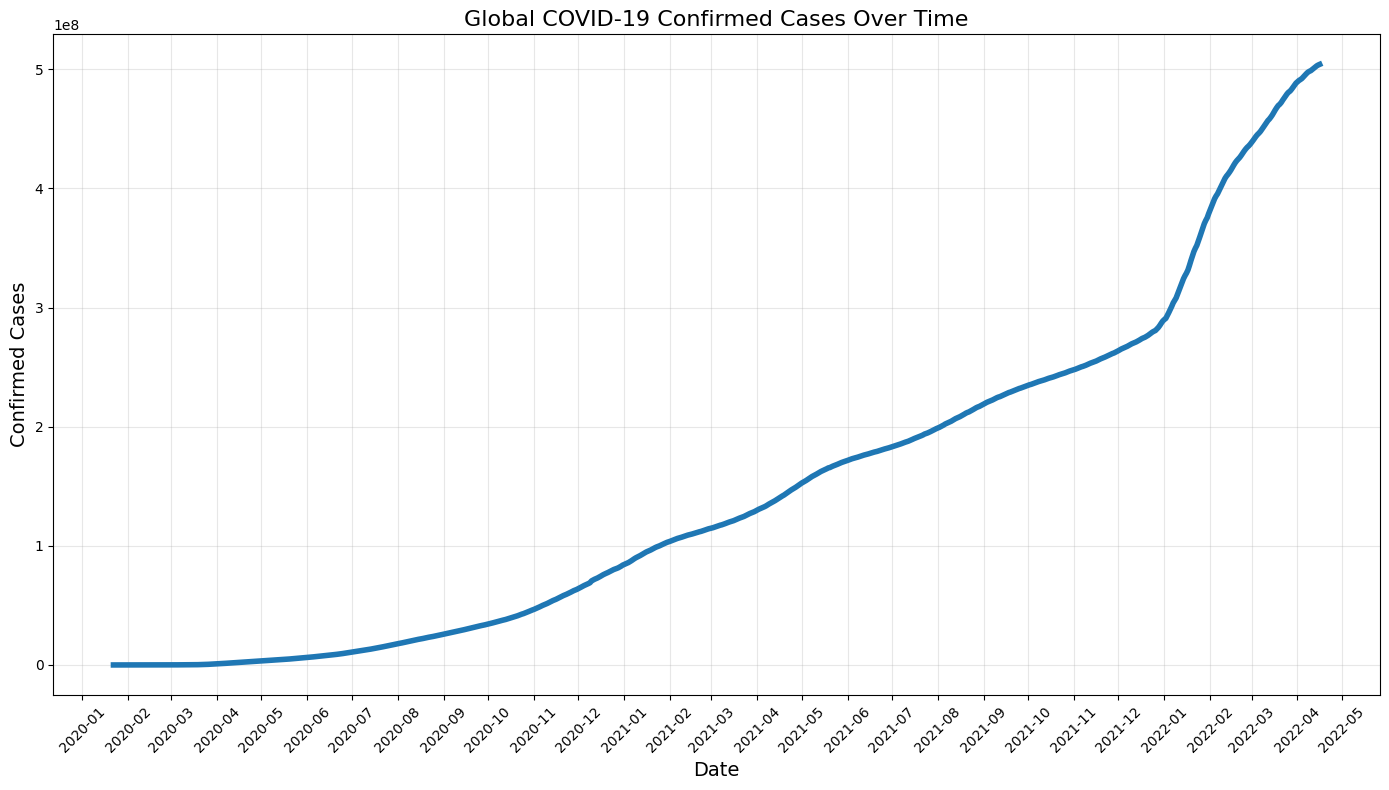

In [44]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 8))
plt.plot(global_cases["Date"], global_cases["Confirmed"], linewidth=4)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.title("Global COVID-19 Confirmed Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Confirmed Cases", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

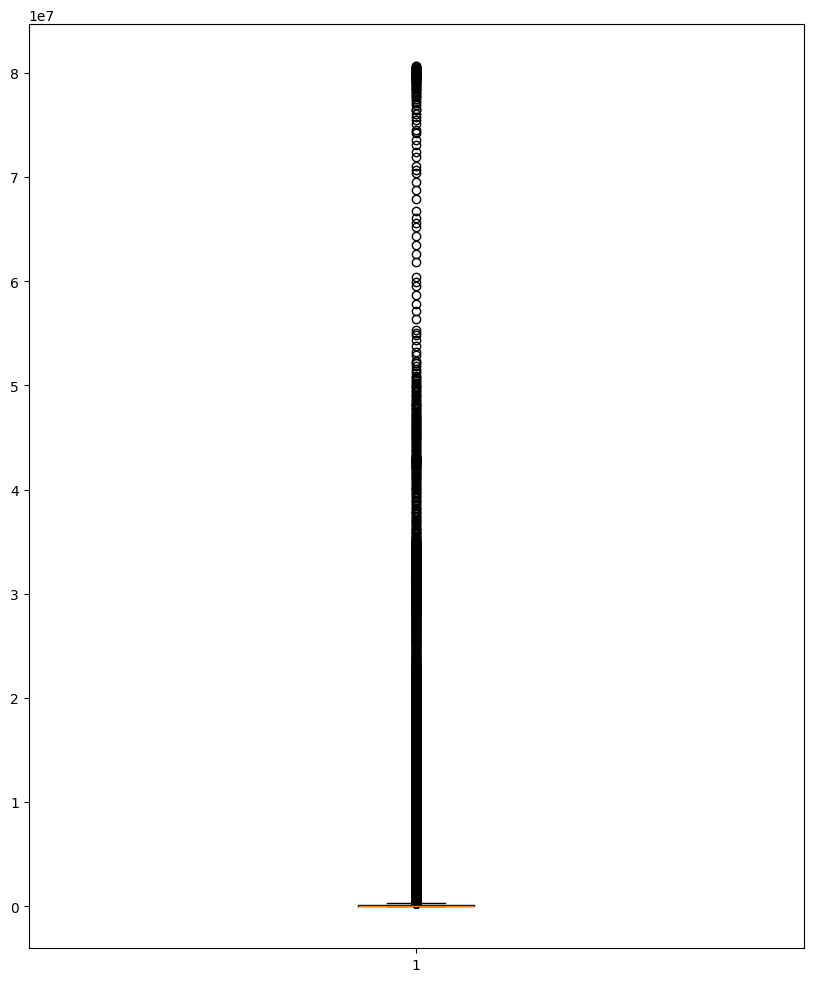

In [45]:
# find outliers using boxplot
plt.figure(figsize=(10, 12))
plt.boxplot(cov_df["Confirmed"])
plt.show()

---
# $$ Activity.No.4 $$
---


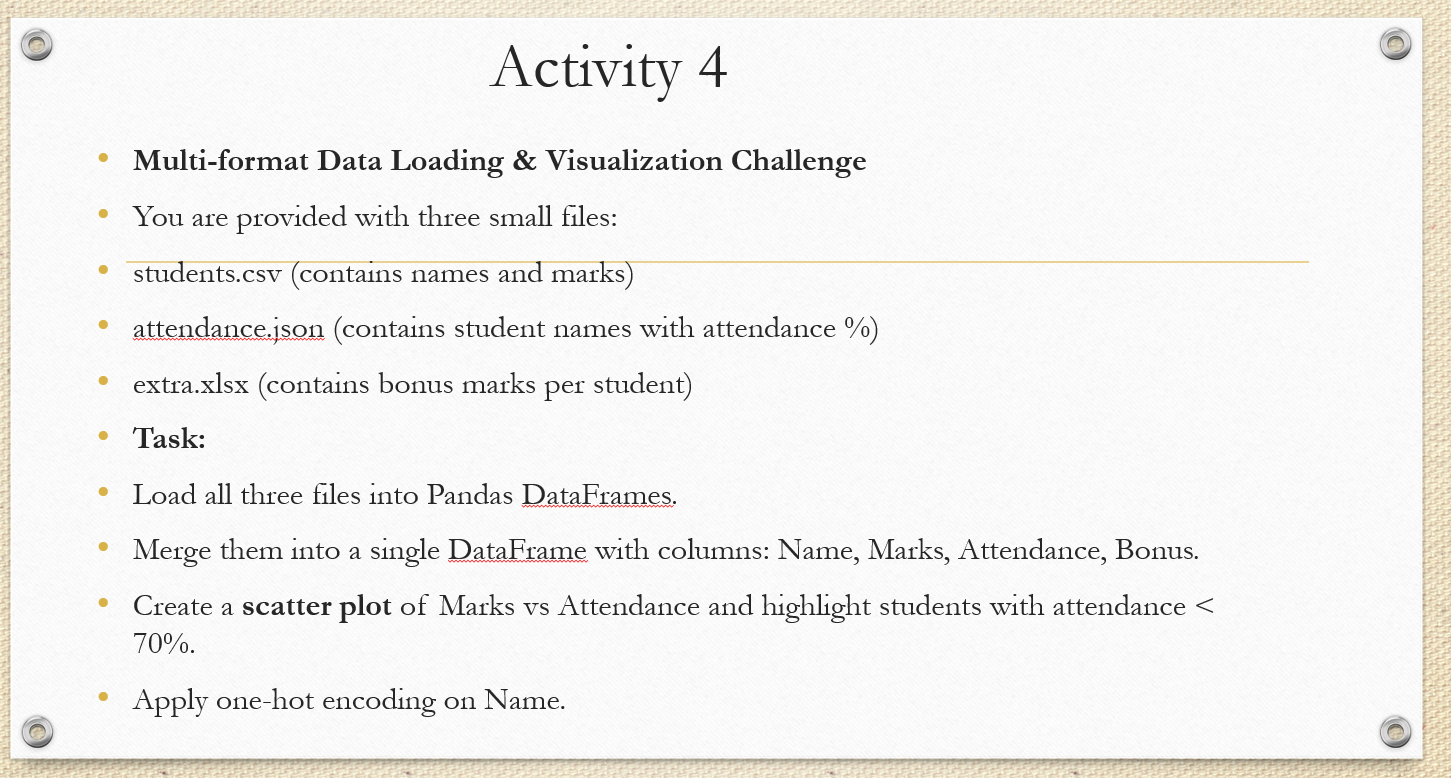


In [46]:
students_data = pd.read_csv("Datasets/students.csv")
print(students_data.shape)
students_data.head(5)

(50, 2)


Name  Marks
0  Student_1     78
1  Student_2     91
2  Student_3     68
3  Student_4     54
4  Student_5     82

In [47]:
attendence_data = pd.read_json("Datasets/attendance.json")
print(attendence_data.shape)
attendence_data.head(5)

(50, 2)


Name  Attendance
0  Student_1          86
1  Student_2          56
2  Student_3          70
3  Student_4          58
4  Student_5          88

In [48]:
extra_data = pd.read_excel("Datasets/extra.xlsx")
print(extra_data.shape)
extra_data.head(5)

(50, 2)


Name  Bonus
0  Student_1      4
1  Student_2      7
2  Student_3      9
3  Student_4      8
4  Student_5      8

In [49]:
# merge all thre data frames into 1:
merged_df = pd.merge(students_data, attendence_data, on="Name")
merged_df = pd.merge(merged_df, extra_data, on="Name")
print(merged_df.shape)
merged_df.head(5)

(50, 4)


Name  Marks  Attendance  Bonus
0  Student_1     78          86      4
1  Student_2     91          56      7
2  Student_3     68          70      9
3  Student_4     54          58      8
4  Student_5     82          88      8

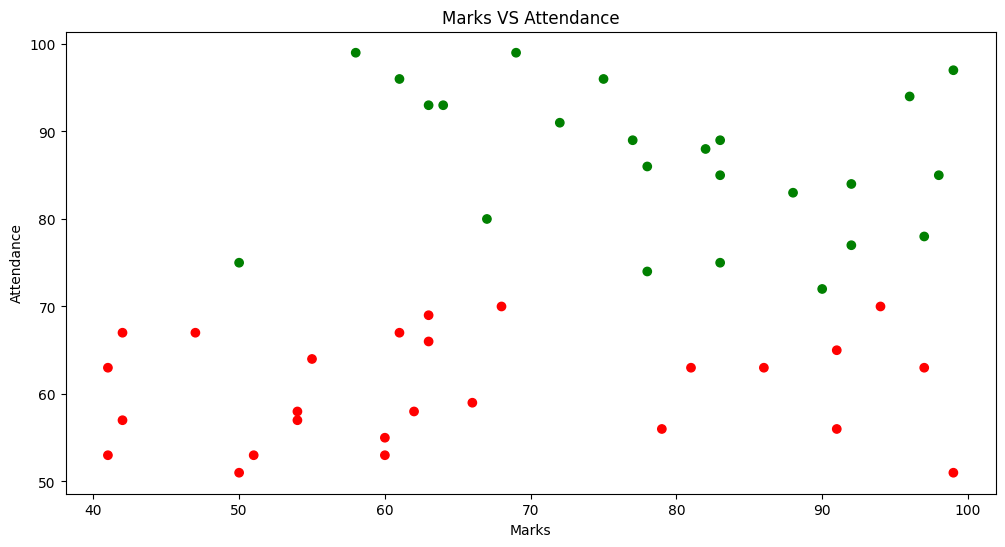

In [50]:
plt.figure(figsize=(12, 6))

coloring = [
    "green" if attendance > 70 else "red" for attendance in merged_df["Attendance"]
]

plt.scatter(
    merged_df["Marks"],
    merged_df["Attendance"],
    c=coloring,
)
plt.title("Marks VS Attendance")
plt.xlabel("Marks")
plt.ylabel("Attendance")
plt.show()

In [51]:
onehot_students_2 = pd.get_dummies(merged_df, columns=["Name"])
onehot_students_2.head(5)

Marks  Attendance  Bonus  Name_Student_1  Name_Student_10  Name_Student_11  \
0     78          86      4            True            False            False   
1     91          56      7           False            False            False   
2     68          70      9           False            False            False   
3     54          58      8           False            False            False   
4     82          88      8           False            False            False   

   Name_Student_12  Name_Student_13  Name_Student_14  Name_Student_15  ...  \
0            False            False            False            False  ...   
1            False            False            False            False  ...   
2            False            False            False            False  ...   
3            False            False            False            False  ...   
4            False            False            False            False  ...   

   Name_Student_46  Name_Student_47  Name_Student_48  Name_Student_49  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Name_Student_5  Name_Student_50  Name_Student_6  Name_Student_7  \
0           False            False           False           False   
1           False            False           False           False   
2           False            False           False           False   
3           False            False           False           False   
4            True            False           False           False   

   Name_Student_8  Name_Student_9  
0           False           False  
1           False           False  
2           False           False  
3           False           False  
4           False           False  

[5 rows x 53 columns]

In [52]:
onehot_students_2.columns

Index(['Marks', 'Attendance', 'Bonus', 'Name_Student_1', 'Name_Student_10',
       'Name_Student_11', 'Name_Student_12', 'Name_Student_13',
       'Name_Student_14', 'Name_Student_15', 'Name_Student_16',
       'Name_Student_17', 'Name_Student_18', 'Name_Student_19',
       'Name_Student_2', 'Name_Student_20', 'Name_Student_21',
       'Name_Student_22', 'Name_Student_23', 'Name_Student_24',
       'Name_Student_25', 'Name_Student_26', 'Name_Student_27',
       'Name_Student_28', 'Name_Student_29', 'Name_Student_3',
       'Name_Student_30', 'Name_Student_31', 'Name_Student_32',
       'Name_Student_33', 'Name_Student_34', 'Name_Student_35',
       'Name_Student_36', 'Name_Student_37', 'Name_Student_38',
       'Name_Student_39', 'Name_Student_4', 'Name_Student_40',
       'Name_Student_41', 'Name_Student_42', 'Name_Student_43',
       'Name_Student_44', 'Name_Student_45', 'Name_Student_46',
       'Name_Student_47', 'Name_Student_48', 'Name_Student_49',
       'Name_Student_5', 'Name_

---
# $$ Activity.No.5 $$
---


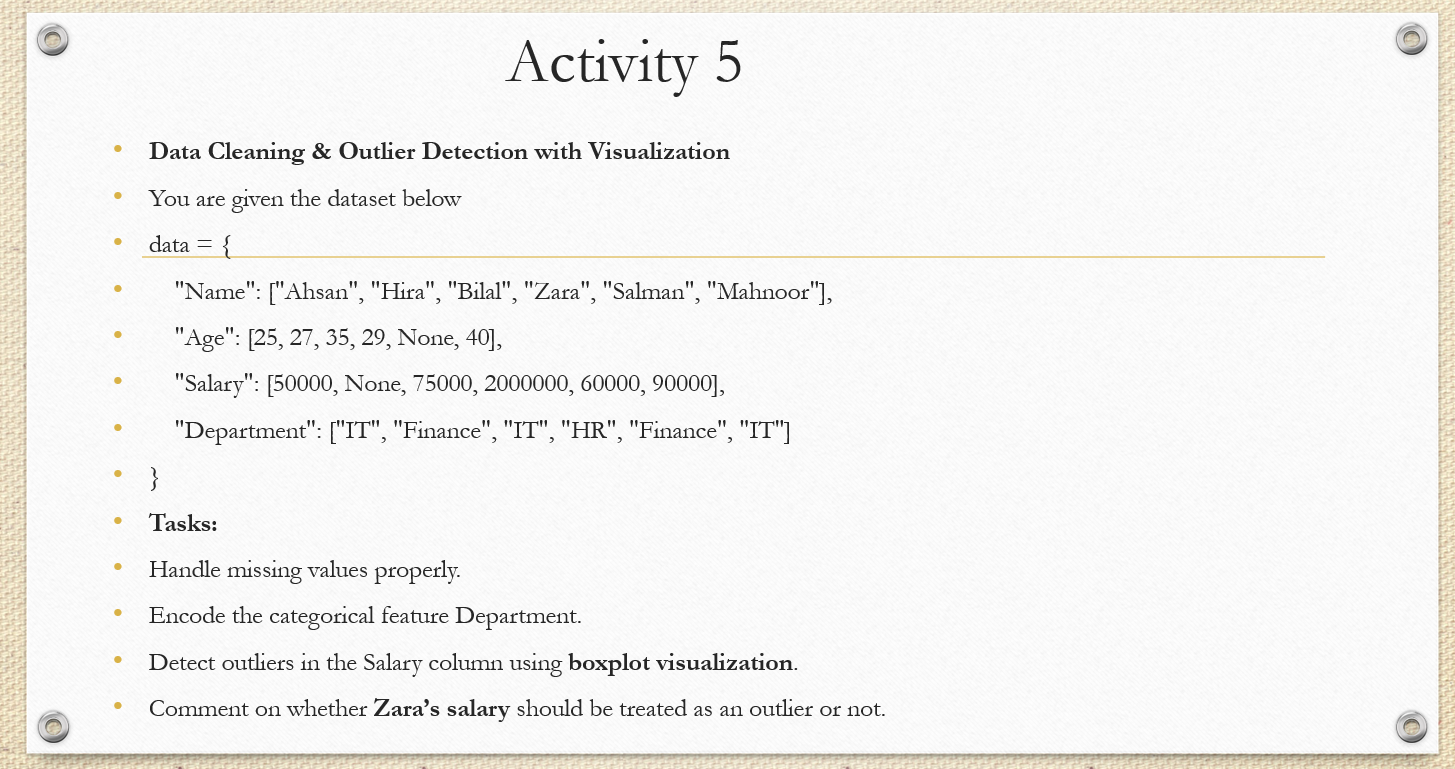


In [53]:
data = {
    "Name": ["Ahsan", "Hira", "Bilal", "Zara", "Salman", "Mahnoor"],
    "Age": [25, 27, 35, 29, None, 40],
    "Salary": [50000, None, 75000, 2000000, 60000, 90000],
    "Department": ["IT", "Finance", "IT", "HR", "Finance", "IT"],
}
df = pd.DataFrame(data)
df

Name   Age     Salary Department
0    Ahsan  25.0    50000.0         IT
1     Hira  27.0        NaN    Finance
2    Bilal  35.0    75000.0         IT
3     Zara  29.0  2000000.0         HR
4   Salman   NaN    60000.0    Finance
5  Mahnoor  40.0    90000.0         IT

In [54]:
df.dtypes

Name           object
Age           float64
Salary        float64
Department     object
dtype: object

In [55]:
print("Age statistics:")
print(f"Mean age: {df['Age'].mean():.1f}")
print(f"Median age: {df['Age'].median():.1f}")
print("All ages:", df["Age"].dropna().tolist())

Age statistics:
Mean age: 31.2
Median age: 29.0
All ages: [25.0, 27.0, 35.0, 29.0, 40.0]


In [56]:
df.isnull().sum()
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
df["Age"] = df["Age"].fillna(df["Age"].median())
df

Name   Age     Salary Department
0    Ahsan  25.0    50000.0         IT
1     Hira  27.0   455000.0    Finance
2    Bilal  35.0    75000.0         IT
3     Zara  29.0  2000000.0         HR
4   Salman  29.0    60000.0    Finance
5  Mahnoor  40.0    90000.0         IT

In [57]:
le = LabelEncoder()
df["Department"] = le.fit_transform(df["Department"])
df

Name   Age     Salary  Department
0    Ahsan  25.0    50000.0           2
1     Hira  27.0   455000.0           0
2    Bilal  35.0    75000.0           2
3     Zara  29.0  2000000.0           1
4   Salman  29.0    60000.0           0
5  Mahnoor  40.0    90000.0           2

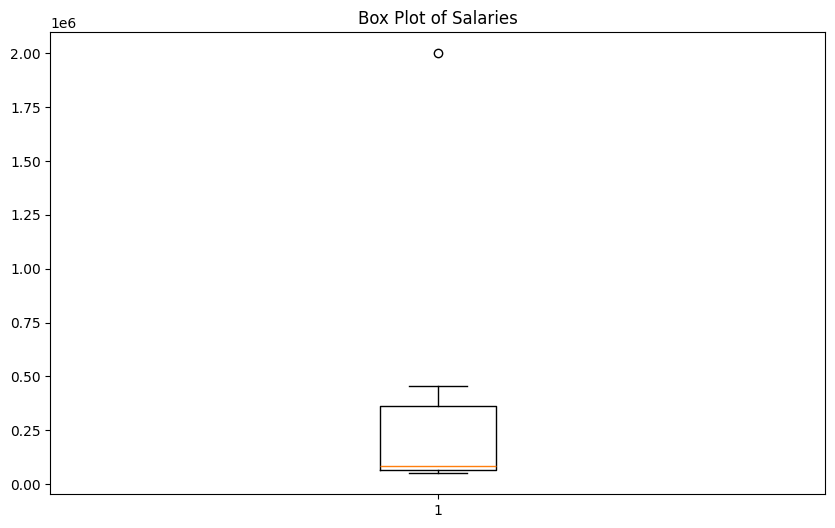

In [58]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Salary"])
plt.title("Box Plot of Salaries")
plt.show()

- from the box plot, its pretty obvious that 2 million salary for Zara is really absurd and obviously an outlier. just for the sake of practice, lets try to manually calculate Q2, median, Q3 and then find the IQR as well as the lower and upper bounds. The expected result would be whatever the upper bound would be, 2 million will be way beyond that


In [59]:
print(f"Q1 (25th percentile): {df['Salary'].quantile(0.25):.0f}")
print(f"Q2 (Median): {df['Salary'].median():.0f}")
print(f"Q3 (75th percentile): {df['Salary'].quantile(0.75):.0f}")
print(f"IQR: {df['Salary'].quantile(0.75) - df['Salary'].quantile(0.25):.0f}")

Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nOutlier boundaries:")
print(f"Lower bound: {lower_bound:.0f}")
print(f"Upper bound: {upper_bound:.0f}")

Q1 (25th percentile): 63750
Q2 (Median): 82500
Q3 (75th percentile): 363750
IQR: 300000

Outlier boundaries:
Lower bound: -386250
Upper bound: 813750


- as exptected, the upper bound is only around 800k whereas Zara's salary is 2 million, so 1200k over the upper bound, hence its an obvious outlier
